In [1]:
import torch
import numpy as np
from lcmr.grammar import Scene
from lcmr.renderer import OpenGLRenderer2D
from lcmr_ext.renderer.renderer2d import PyDiffVgRenderer2D, PyTorch3DRenderer2D
from lcmr.utils.presentation import display_img

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [2]:
translation = torch.tensor([[0.5, 0.501], [0.5, 0.5], [0.5, 0.5]], dtype=torch.float32)[None, None, ...]
color = torch.tensor([[0.9, 0, 0], [0, 0.9, 0], [0, 0, 0.9]], dtype=torch.float32)[None, None, ...]
scale = torch.tensor([[0.1, 0.5], [0.1, 0.1], [0.2, 0.2]])[None, None, ...]
confidence = torch.tensor([[0.9], [0.5], [0.2]])[None, None, ...]
angle = torch.tensor([[-np.pi / 4], [0], [0]], dtype=torch.float32)[None, None, ...]
example_scene1 = Scene.from_tensors(translation=translation, scale=scale, color=color, confidence=confidence, angle=angle)

translation = torch.tensor([[0, 0], [0, 1], [1, 0]], dtype=torch.float32)[None, None, ...]
example_scene2 = Scene.from_tensors(translation=translation, scale=scale, color=color, confidence=confidence, angle=angle)

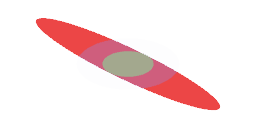

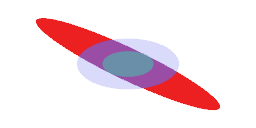

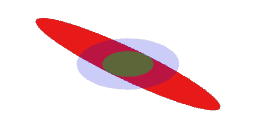

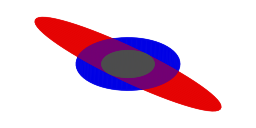

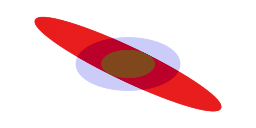

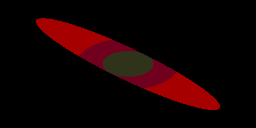

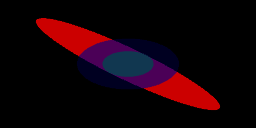

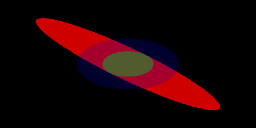

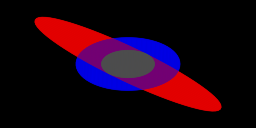

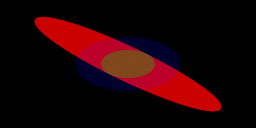

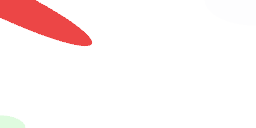

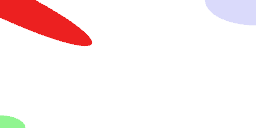

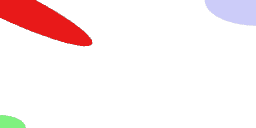

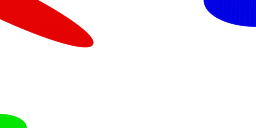

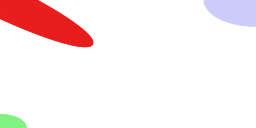

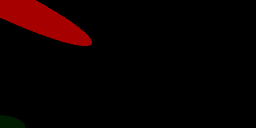

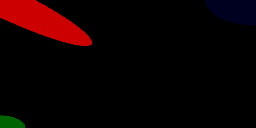

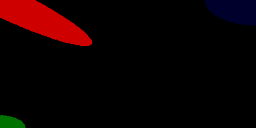

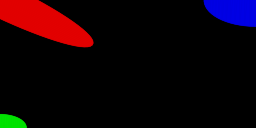

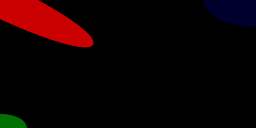

In [4]:
white = torch.tensor([1.0, 1.0, 1.0, 1.0])
black = torch.tensor([0.0, 0.0, 0.0, 1.0])

for example_scene in [example_scene1, example_scene2]:
    for background_color in [white, black]:

        renderer = OpenGLRenderer2D((128, 256), background_color=background_color, gamma_rgb=1.0, gamma_confidence=1.0)
        display_img(renderer.render(example_scene)[0])

        renderer = OpenGLRenderer2D((128, 256), background_color=background_color)
        display_img(renderer.render(example_scene)[0])

        renderer = PyDiffVgRenderer2D((128, 256), background_color=background_color, device=device)
        display_img(renderer.render(example_scene.to(renderer.device))[0])

        renderer = PyTorch3DRenderer2D((128, 256), background_color=background_color, device=device)
        display_img(renderer.render(example_scene.to(renderer.device), with_alpha=False)[0])
        display_img(renderer.render(example_scene.to(renderer.device))[0])